In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 10.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

def smiles_to_morgan_fingerprint(smiles, radius=2, n_bits=256):

    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        return np.array(fingerprint)
    else:
        raise ValueError(f"Invalid SMILES string: {smiles}")

In [ ]:
df_y=pd.read_csv('amino (1).csv')
# df_y=df_y["Exp. % MGS"]
std_amino=pd.read_csv('std_amino (1).csv')
df_y.tail()

,Name,SMILES,Concentration (mM),ExpperMGS,ExpErr,Set
72,(2s)-2-amino-3-(3-chloro-4-hydroxyphenyl)propa...,N[C@@H](Cc1ccc(O)c(Cl)c1)C(O)=O,20,14.0,2.6,predict
73,(2r)-2-acetamidopropanoic acid,C[C@@H](NC(C)=O)C(O)=O,20,76.9,11.8,predict
74,"(2s)-2-carboxy-1,1-dimethylpyrrolidin-1-ium ch...",C[N+]1(C)CCC[C@H]1C(O)=O,20,91.8,13.3,predict
75,"(2r)-4,4-dimethylpyrrolidine-2-carboxylic acid",CC1(C)CN[C@H](C1)C(O)=O,20,76.8,11.6,predict
76,"ethyl 2-amino-5-methyl-1,3-oxazole-4-carboxylate",CCOC(=O)c1nc(N)oc1C,20,7.1,3.4,predict


In [ ]:
df_X = std_amino.iloc[:, 1:46]
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,5.35209,202.75799,-0.57,-2.6333,89.04768,2.66667,0.34456,0.66667,3,3,...,3,0,3,0,0,0,0.60004,103.44666,0.54042,67.77
1,6.53964,352.75251,-0.57,-1.9972,117.07898,2.12500,0.34457,0.80000,3,3,...,3,0,5,0,0,0,0.61105,184.84731,0.37121,67.77
2,6.79647,432.91734,-0.57,-1.6071,131.09463,2.22222,0.34456,0.83333,3,3,...,3,0,6,0,0,0,0.73032,234.45255,0.42377,67.77
3,6.95724,448.91734,-0.57,-1.6071,131.09463,2.33333,0.34457,0.83333,3,3,...,3,0,6,0,0,0,0.59394,193.90623,0.32306,67.77
4,3.71297,351.58250,-0.57,-2.5379,115.06333,2.25000,0.34637,0.80000,2,3,...,2,1,1,0,1,1,0.66241,118.53148,0.44687,56.74


In [ ]:
fingerprints = df_y['SMILES'].apply(smiles_to_morgan_fingerprint)
df_X = pd.DataFrame(fingerprints.tolist(), index=df_y.index)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras.optimizers import Adagrad,Nadam,Adam,RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [ ]:
train_df_y = df_y[:-14]
test_df_y = df_y[-14:]
train_df_x = df_X[:-14]
test_df_x = df_X[-14:]

In [ ]:
len(train_df_y),len(test_df_y)

(63, 14)

In [ ]:
def create_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(20, activation='relu')(inputs)
    x = Dense(60, activation='relu')(x)
    x = Dense(80, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Nadam(learning_rate=0.01), loss='mse',)
    return model

y = train_df_y["ExpperMGS"].values.flatten()
X= train_df_x.values
input_shape = (X.shape[1],)
model_std = create_model(input_shape)
model_std.fit(X, y, epochs=300, batch_size=16, verbose=1)
std_pred = model_std.predict(test_df_x)

Epoch 1/300
4/4 [==============================] - 2s 6ms/step - loss: 3426.2390
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 2258.1680
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 1183.5859
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 828.8922
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 619.2570
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 411.8174
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 276.2716
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 215.5102
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 100.0755
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 56.6019
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 48.2834
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 33.8359
Epoch 13/300
4/4 [===================

In [ ]:
mse = np.mean((std_pred.flatten() - test_df_y['ExpperMGS'])**2)
pcc, _ = pearsonr(test_df_y['ExpperMGS'], std_pred.flatten())
mse,pcc

(559.0436449682246, 0.6760933323276384)

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
X = df_X.values
# masker = shap.maskers.Independent(data=X)
explainer = shap.KernelExplainer(model_std,X)
shap_values = explainer.shap_values(X)

  0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
shap_values = np.reshape(shap_values, (77,256))
np.shape(shap_values.data)

(77, 256)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[21])

In [ ]:
explainer.expected_value

array([47.43030068])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values)

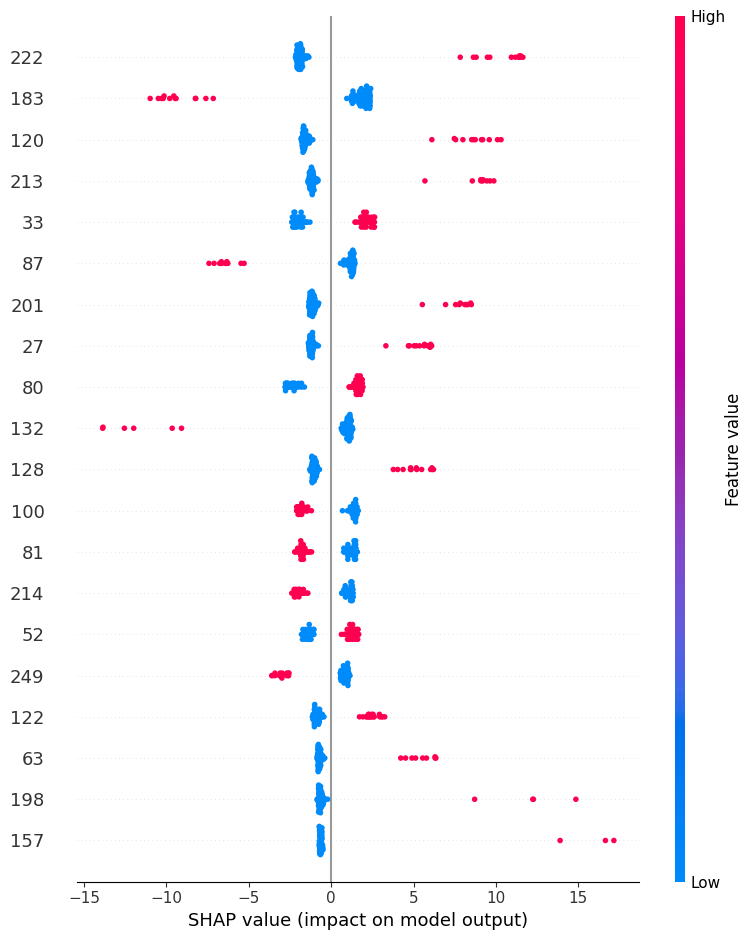

In [ ]:
exp = shap.Explanation(shap_values, data = X, feature_names=df_X.columns)
shap.summary_plot(exp)

In [ ]:
shap_df = pd.DataFrame(shap_values)
shap_df.shape

(77, 256)

<BarContainer object of 256 artists>

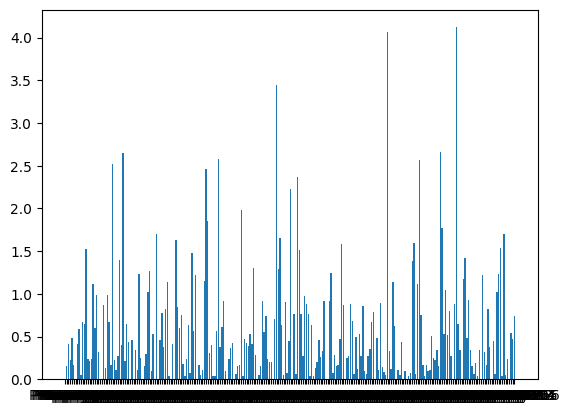

In [ ]:
mod_sum=shap_df.abs().sum()/60
mod_sum = pd.DataFrame(mod_sum, columns=['weight'])
mod_sum['Property'] = [f'Property {i+1}' for i in range(shap_df.shape[1])]
mod_sum = mod_sum[['Property', 'weight']]
plt.bar(mod_sum['Property'], mod_sum['weight'])

In [ ]:
df_sorted = mod_sum.sort_values(by='weight',ascending=False)
df_sorted

,Property,weight
222,Property 223,4.120084
183,Property 184,4.059053
120,Property 121,3.442134
213,Property 214,2.661399
33,Property 34,2.649457
...,...,...
20,Property 21,0.000000
53,Property 54,0.000000
118,Property 119,0.000000
236,Property 237,0.000000
